# KPMG Virtual Data Analytics Internship

## Problem scenerio

For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.



### Task 2:  Data Quality Assessment

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the entire data set & Seperate it into four dataset for further analysis

demographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',skiprows=1)
cust_address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress',skiprows=1)
transanction = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions',skiprows=1)

# We also have to seperate our new customer list
new_cust_list = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList',skiprows=1)

/var/folders/wk/q2x1_8p93p98g226j8kx4_nh0000gn/T/ipykernel_6235/2565241970.py:9: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',skiprows=1)
/var/folders/wk/q2x1_8p93p98g226j8kx4_nh0000gn/T/ipykernel_6235/2565241970.py:14: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_cust_list = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList',skiprows=1)


### 1. Complete Data Exploration 

##### a. Data distributions

In [238]:
# Merge the dataset within these three files

df= pd.merge(demographic, transanction, on = 'customer_id')
df= pd.merge(df,cust_address, on = 'customer_id')
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,medium,1577.53,826.51,39526.0,060 Morning Avenue,2016,New South Wales,Australia,10
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,low,small,1720.70,1531.42,37823.0,060 Morning Avenue,2016,New South Wales,Australia,10
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,medium,360.40,270.30,37873.0,060 Morning Avenue,2016,New South Wales,Australia,10
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,medium,71.49,53.62,38573.0,060 Morning Avenue,2016,New South Wales,Australia,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,medium,medium,792.90,594.68,33879.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19964,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,medium,medium,1228.07,400.91,36668.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19965,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,medium,small,1311.44,1167.18,33888.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19966,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,medium,medium,60.34,45.26,34165.0,9491 Green Ridge Terrace,2100,NSW,Australia,10


In [239]:
# Dataframe dimension (rows, columns)

df.shape

(19968, 30)

In [240]:
# Data Profiling (i.e. data types, non null values and columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  int64         
 1   first_name                           19968 non-null  object        
 2   last_name                            19326 non-null  object        
 3   gender                               19968 non-null  object        
 4   past_3_years_bike_related_purchases  19968 non-null  int64         
 5   DOB                                  19522 non-null  datetime64[ns]
 6   job_title                            17589 non-null  object        
 7   job_industry_category                16746 non-null  object        
 8   wealth_segment                       19968 non-null  object        
 9   deceased_indicator                   19968 non-null  object        
 10  default   

In [241]:
# Checking any duplicate values in the datset

df.duplicated().sum()  # No duplicate values

0

In [242]:
# Null values in the datset

df.isnull().sum()

customer_id                               0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
default                                1451
owns_car                                  0
tenure                                  446
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                              0
brand                                   195
product_line                            195
product_class                           195
product_size                            195
list_price                      

In the demographic sheet their are 6 column having missing dataset i.e job_industry_category,  job_title,  job_title, DOB,  last_name,  and tenure.

In [243]:
# Check unique values in each columns;

df.nunique()

customer_id                             3489
first_name                              2835
last_name                               3263
gender                                     6
past_3_years_bike_related_purchases      100
DOB                                     3047
job_title                                195
job_industry_category                      9
wealth_segment                             3
deceased_indicator                         2
default                                   90
owns_car                                   2
tenure                                    22
transaction_id                         19968
product_id                               101
transaction_date                         364
online_order                               2
order_status                               2
brand                                      6
product_line                               4
product_class                              3
product_size                               3
list_price

In [244]:
# Explore the columns

df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [245]:
# 1.Gender

df['gender'].value_counts()

Female    9979
Male      9510
U          455
F           11
Femal        7
M            6
Name: gender, dtype: int64

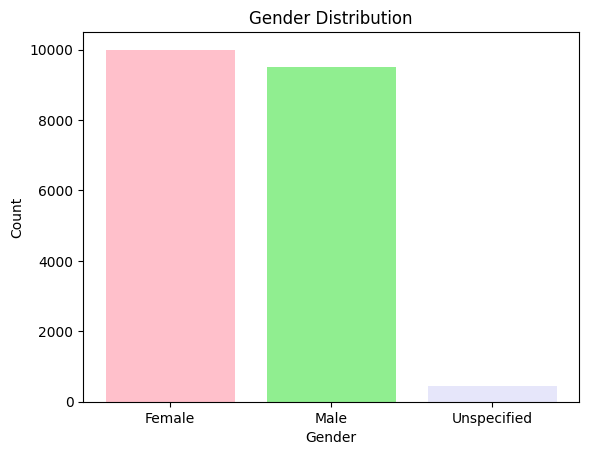

In [246]:
# Replace the categorical values

df['gender'].replace('M', 'Male', inplace=True)
df['gender'].replace('F', 'Female', inplace=True)
df['gender'].replace('Femal', 'Female', inplace=True)
df['gender'].replace('U', 'Unspecified', inplace=True)

gender_counts = df['gender'].value_counts()

# Plotting the gender counts with color
plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'lightgreen', 'lavender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.show()


In [247]:
# 2. past_3_years_bike_related_purchases column

df['past_3_years_bike_related_purchases'].value_counts()

16    291
80    273
48    257
20    256
2     256
     ... 
3     133
92    118
8     115
85    115
86    108
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

In [248]:
# 3. Checking DOB column for any ages above 100

# Get the current date
current_date = datetime.now()       

# Calculate the age by subtracting the DOB from the current date
df['age'] = (current_date - df['DOB']) / pd.Timedelta(days=365.25)

# Filter rows where age is greater than 100
age_greater_than_100 = df[df['age'] > 100]

# print age greater than 100
age_greater_than_100

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation,age
171,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,small,1703.52,1516.13,40649.0,833 Luster Way,4005,QLD,Australia,8,179.433081
172,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,medium,958.74,748.90,38693.0,833 Luster Way,4005,QLD,Australia,8,179.433081
173,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,large,2083.94,675.03,41533.0,833 Luster Way,4005,QLD,Australia,8,179.433081
174,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,medium,1231.15,161.60,38216.0,833 Luster Way,4005,QLD,Australia,8,179.433081
175,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,small,1977.36,1759.85,40779.0,833 Luster Way,4005,QLD,Australia,8,179.433081
176,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,medium,1163.89,589.27,42560.0,833 Luster Way,4005,QLD,Australia,8,179.433081
177,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,NaN,1034.17,NaN,NaN,833 Luster Way,4005,QLD,Australia,8,179.433081
178,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,small,1172.78,1043.77,37539.0,833 Luster Way,4005,QLD,Australia,8,179.433081
179,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,medium,1807.45,778.69,42145.0,833 Luster Way,4005,QLD,Australia,8,179.433081


Here, we have one customers with customer id =34, having age more than 100, which is practically impossible. Thus, we need drop it.

In [249]:
# Drop rows where customer ID = 34

customer_id = 34

# Drop rows with customer ID 34
df = df.drop(df[df['customer_id'] == customer_id].index)

In [250]:
# 4. Checking job_title 

df['job_title'].value_counts()


Social Worker                           226
Business Systems Development Analyst    221
Assistant Professor                     212
Legal Assistant                         212
Executive Secretary                     208
                                       ... 
Administrative Assistant I               15
Health Coach III                         14
Geologist II                             11
Research Assistant III                    9
Developer I                               7
Name: job_title, Length: 195, dtype: int64

It seems like more of the individula work as a Social Worker, Business analyst, Assistant Professor,Legal Assistant, Executive secretary are some of the prime users.

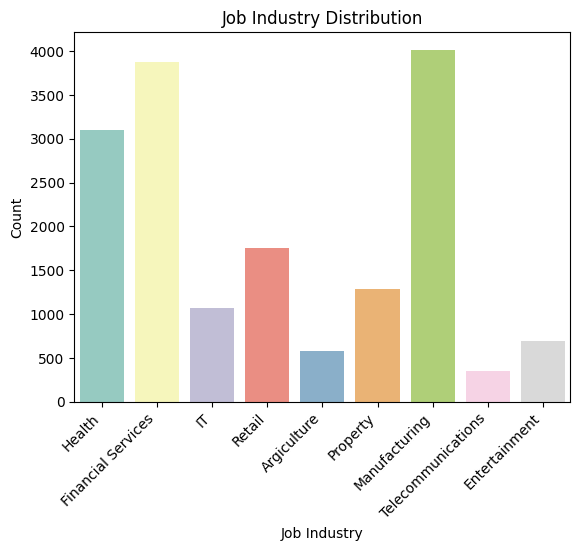

In [251]:
# 5. Checking job_industry_category 

job_industry_category = df['job_industry_category'].value_counts()

# Plotting the Job Industry counts with color using Seaborn
sns.countplot(x='job_industry_category', data=df, palette='Set3')
plt.xlabel('Job Industry')
plt.ylabel('Count')
plt.title('Job Industry Distribution')

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

plt.show()

It seems like more of the individula work for Manufacturing, Financial Services & Health are the prime users followed by Retail, Property & IT domain. 

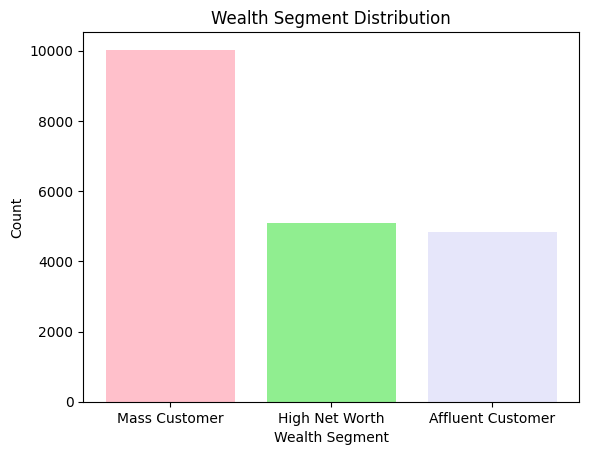

In [252]:
# 6. Checking wealth_segment 
 
wealth_segment = df['wealth_segment'].value_counts()

# Plotting the gender counts with color
plt.bar(wealth_segment.index, wealth_segment.values, color=['pink', 'lightgreen', 'lavender'])
plt.xlabel('Wealth Segment')
plt.ylabel('Count')
plt.title('Wealth Segment Distribution')

plt.show()

In [253]:
# 7. Checking default 

df['default'].value_counts()
df = df.drop('default', axis=1)

This default column is of no importance and can be deleted.

In [254]:
# 8. Checking deceased_indicator 

df['deceased_indicator'].value_counts()

N    19951
Y        8
Name: deceased_indicator, dtype: int64

We have two deceased customer

In [255]:
# 9. Checking owns_car 

df['owns_car'].value_counts()

Yes    10042
No      9917
Name: owns_car, dtype: int64

Looks like we have equal number of customers who has a car and who doesnt have a car.

In [256]:
# 10. Checking tenure 

df['tenure'].value_counts()


7.0     1190
5.0     1096
11.0    1088
16.0    1067
12.0    1060
8.0     1032
14.0    1019
9.0      995
17.0     985
10.0     985
13.0     973
18.0     959
6.0      953
4.0      929
15.0     908
1.0      869
19.0     837
3.0      819
2.0      736
20.0     483
21.0     275
22.0     255
Name: tenure, dtype: int64

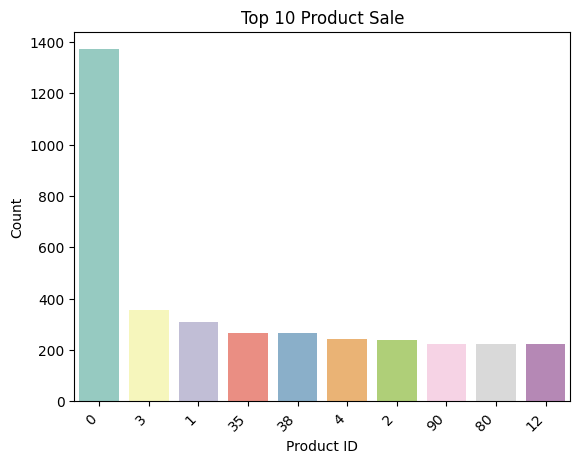

In [265]:
# 11. Checking wealth_segment 

top_10_product_id = df['product_id'].value_counts().nlargest(10)

# Plotting the top 10 Product ID counts using Seaborn
sns.countplot(x='product_id', data=df, order=top_10_product_id.index, palette='Set3')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Top 10 Product Sale')

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

plt.show()

In [257]:
df['state'].value_counts()

NSW                10200
VIC                 4541
QLD                 4253
New South Wales      485
Victoria             480
Name: state, dtype: int64

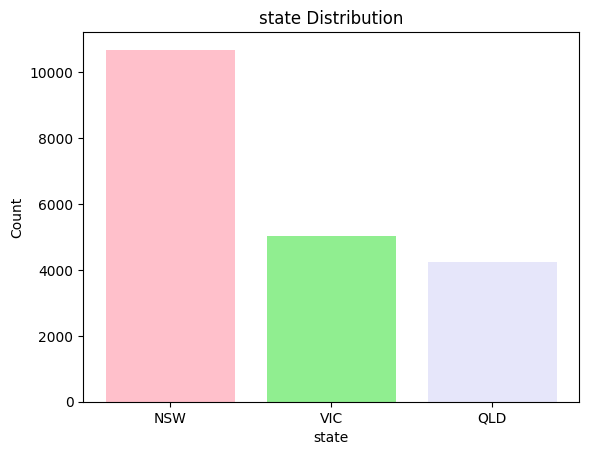

In [258]:
# Replace the categorical values

df['state'].replace('New South Wales', 'NSW', inplace=True)
df['state'].replace('Victoria', 'VIC', inplace=True)

state = df['state'].value_counts()

# Plotting the gender counts with color
plt.bar(state.index, state.values, color=['pink', 'lightgreen', 'lavender'])
plt.xlabel('state')
plt.ylabel('Count')
plt.title('state Distribution')

plt.show()


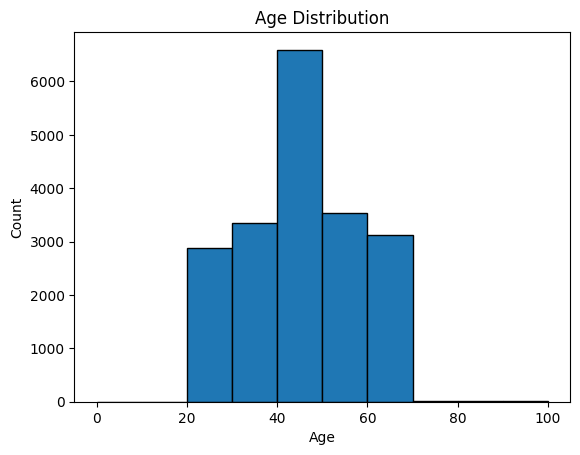

In [259]:
# Visualize the Age groups

# Binning the age values
bin_edges = range(0, 101, 10)  # Define the bin edges (0, 10, 20, ..., 100)
plt.hist(df['age'], bins=bin_edges, edgecolor='black')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

plt.show()

Most of the customer age group are 40-50

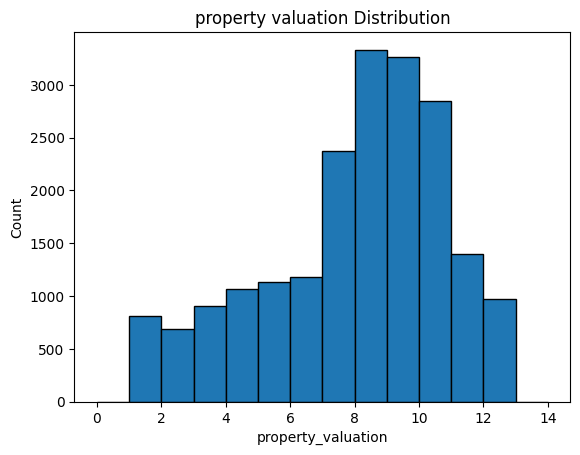

In [260]:
# Visualize the Property valuation

# Binning the age values
bin_edges = range(0, 15, 1)  # Define the bin edges (0, 10, 20, ..., 100)
plt.hist(df['property_valuation'], bins=bin_edges, edgecolor='black')

# Set labels and title
plt.xlabel('property_valuation')
plt.ylabel('Count')
plt.title('property valuation Distribution');

Respective customers having a property valuation range from 7.5 to 10.5 are mostly using the product

### 2. Model Development

In [261]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'age'],
      dtype='object')

### 3. Interpretation